In [9]:
#1.导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#2.读取数据集
dataset = pd.read_csv('AirQualityUCI.csv')
X = dataset.iloc[:500, 2:4].values
y = dataset.iloc[:, 4].values

In [29]:
#3.调用DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=1.5, min_samples=3).fit(X) #DBSCAN聚类方法 还有参数，matric = ""距离计算方法

labels = db.labels_                        #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声
print('每个样本的簇标号:',labels)

raito = len(labels[labels[:] == -1]) / len(labels)  #计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # 获取分簇的数目
print('分簇的数目: %d' % n_clusters_)

每个样本的簇标号: [-1  0 -1 -1 -1  1  2 42  3  4 -1  5 58 -1  6  7 -1  8  9 10 -1 11  0 -1
 59 -1 -1 -1 12 -1 -1 13 14 -1 -1 -1 -1 15 -1 -1  7 16 17 -1 10 18 11 19
 -1 -1 -1 -1 -1 -1 20  1  2 21 -1 -1 22 -1 -1 23 -1 -1 24 -1 17 25 26 -1
 27 -1 -1 -1 28 29 -1 -1 -1 30 -1 31 32 33 -1  9  6 28 29 20 17 -1 -1 34
 -1 -1 -1 -1 47  7 25 25 -1 -1 -1 32 -1 -1 -1 -1 -1 -1 35 29 -1 36 36 28
 -1 -1 -1 -1 34 -1 26 32 37 57 -1 -1 -1 21 -1 -1 -1 -1 24 59 -1 20 23 38
 -1 -1 27 -1 39 -1 17 32 40 -1 -1 -1 41 21 -1 -1 -1 34 -1 24 38 17 -1 -1
 -1 -1 -1 -1 28 -1 -1 -1  5 37 -1 57 -1 53 -1 -1 -1 27 39 -1 39 47 -1 23
 -1 -1 -1 35  6 16 10 42 40 43 -1 -1 37  2 -1 -1 -1 38 -1 26 -1 23 -1 -1
 44 -1 -1 -1 -1 -1 45 15 -1 40 -1 -1 12  5 46  7 -1 27 -1 -1 -1 26 -1 -1
 24 -1 -1 -1 47 11 -1 46 -1  1 -1 31 48  5 -1 -1 46 20 -1 25 45 -1 17 26
 -1 -1 -1 36  1 17 -1  3 56 -1 -1 -1 49 15 -1 39 32 15 -1 -1 22  3 32 -1
 23 -1 -1 20 42 -1 55 37 49 41 -1 -1 -1 31 44 -1 30 11 17 11 21 -1 42 -1
  5  9 11 15 40 -1 13 40 48 -1 -1 41 54 1

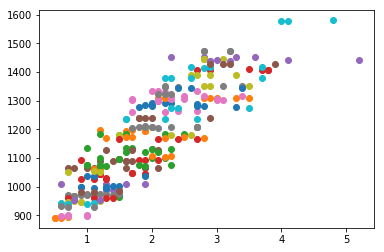

In [30]:
#4.可视化展示
for i in range(n_clusters_):
    #print('簇 ', i, '的所有样本:')
    one_cluster = X[labels == i]
    #print(one_cluster)
    plt.plot(one_cluster[:,0],one_cluster[:,1],'o')
plt.show()

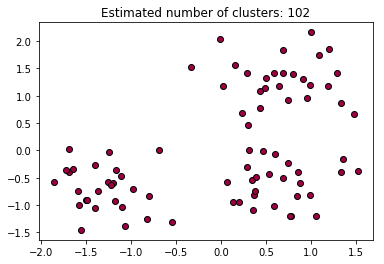

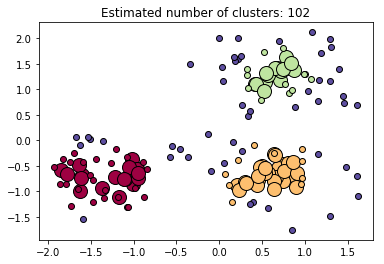

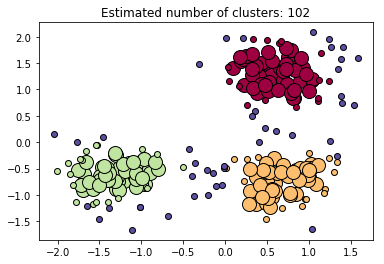

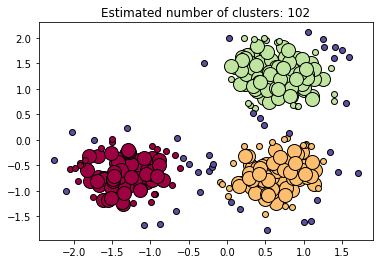

In [27]:
#5.用sklearn的数据集展示密度聚类算法结果
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


for i in range(4):
    # 产生样本数据
    centers = [[1, 1], [-1, -1], [1, -1]]  # 生成聚类中心点
    X, labels_true = make_blobs(n_samples=80*(i+1), centers=centers, cluster_std=0.4,random_state=0) # 生成样本数据集
    X = StandardScaler().fit_transform(X) # StandardScaler作用：去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。
    
    # 调用密度聚类DBSCAN
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  #设置一个样本个数长度的全false向量
    core_samples_mask[db.core_sample_indices_] = True #将核心样本部分设置为true
    labels = db.labels_
    
    # Plot result
    import matplotlib.pyplot as plt
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)  #将所有属于该聚类的样本位置置为true
        xy = X[class_member_mask & core_samples_mask]  # 将所有属于该类的核心样本取出，使用大图标绘制
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]  # 将所有属于该类的非核心样本取出，使用小图标绘制
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()